# Logistic Regression

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import scikitplot as skl
sns.set()

In [18]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [20]:
#pip install scikit-plot


In [21]:
df = pd.read_csv('diabetes.csv')

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [24]:
def adj_r2(x,y,r2):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    adjusted_r2

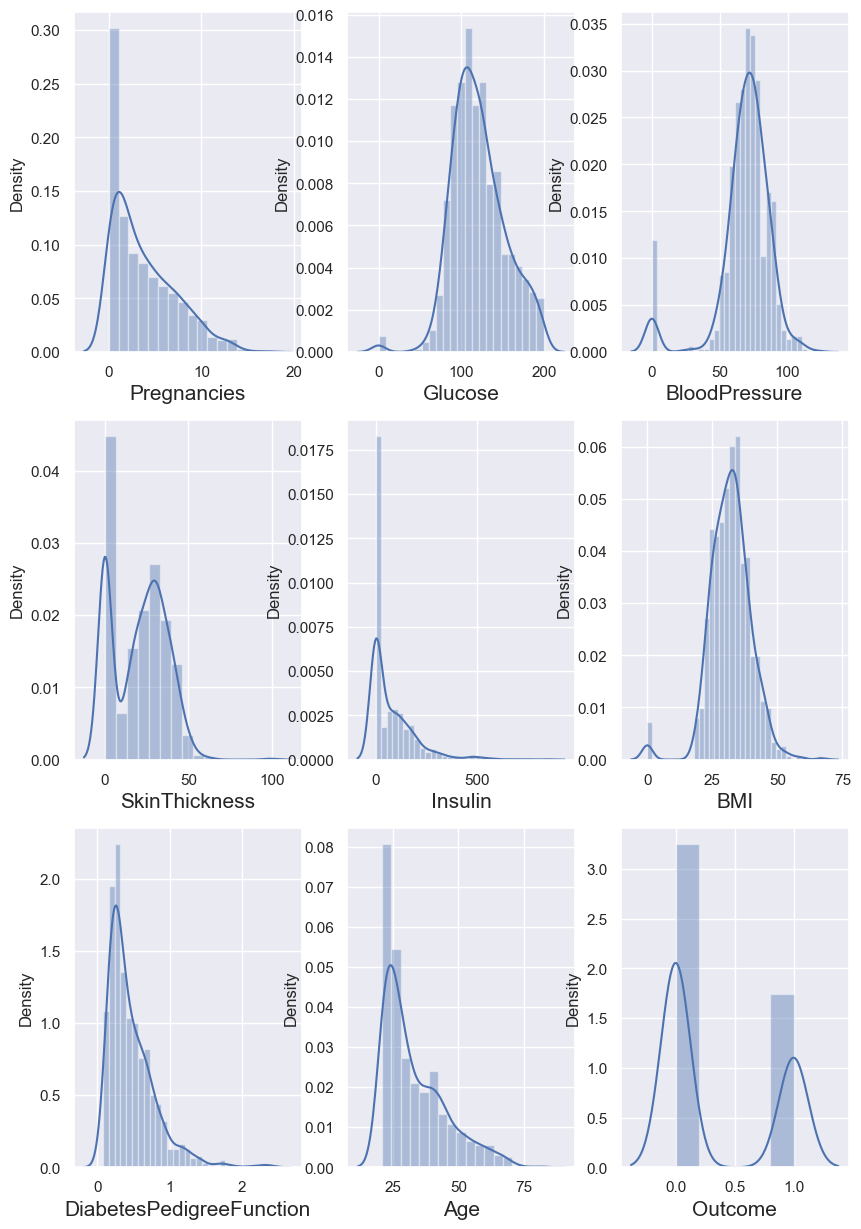

In [25]:
# Data distribution for every coloumn
plt.figure(figsize=(10,15),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber <= 9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
        
    plotnumber+=1
        

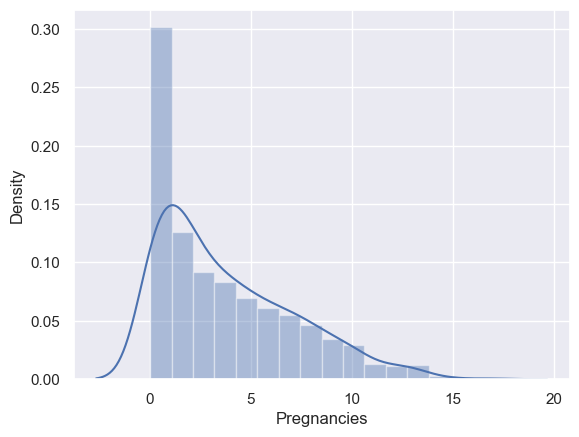

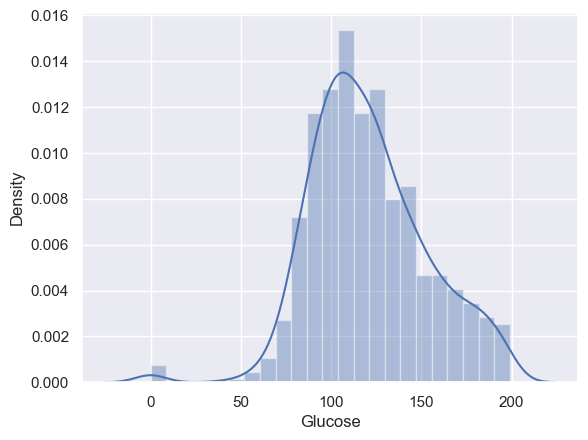

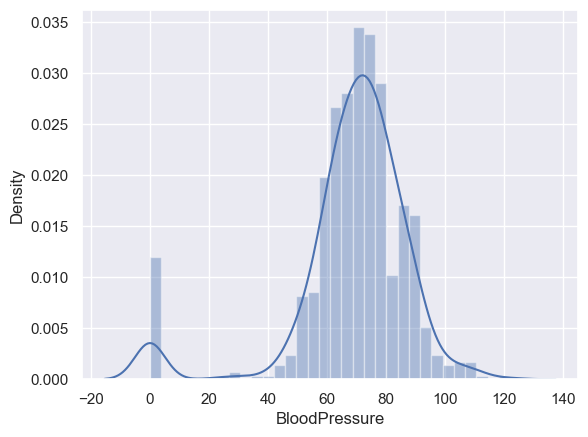

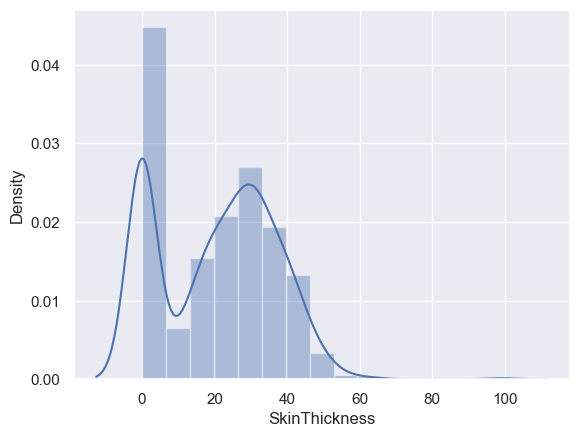

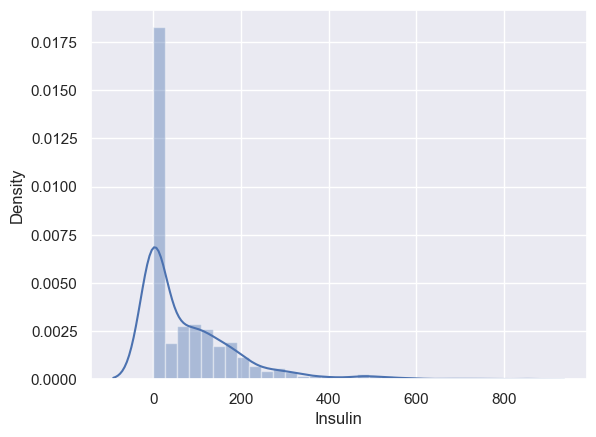

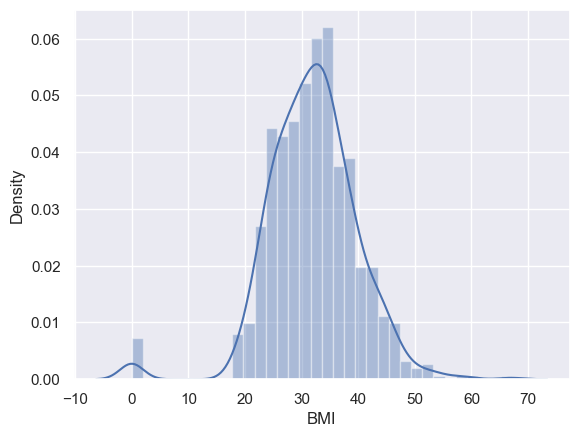

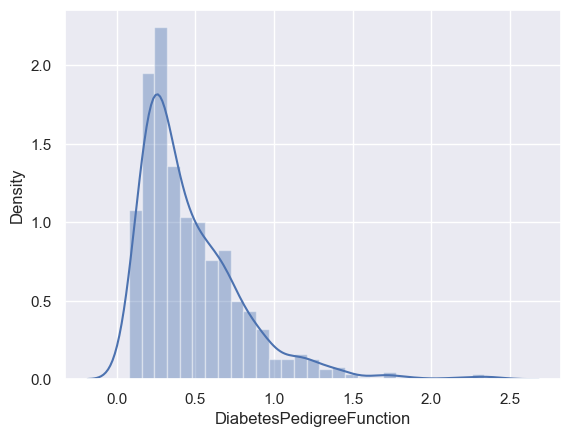

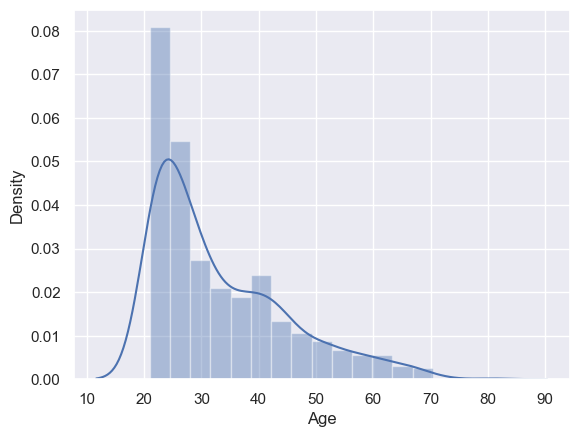

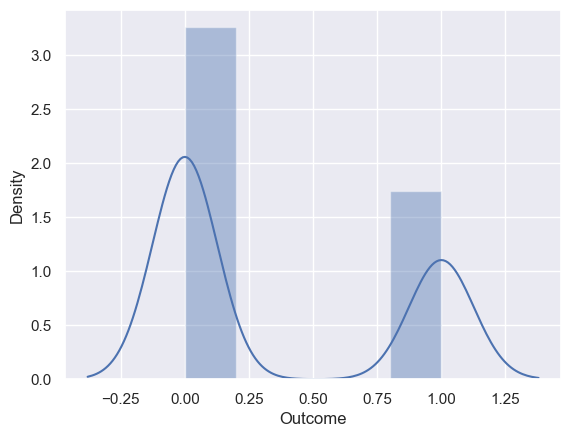

In [26]:
for i in df:
    sns.distplot(df[i])
    plt.show()

In [11]:
# replacing zero values with mean of the column
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

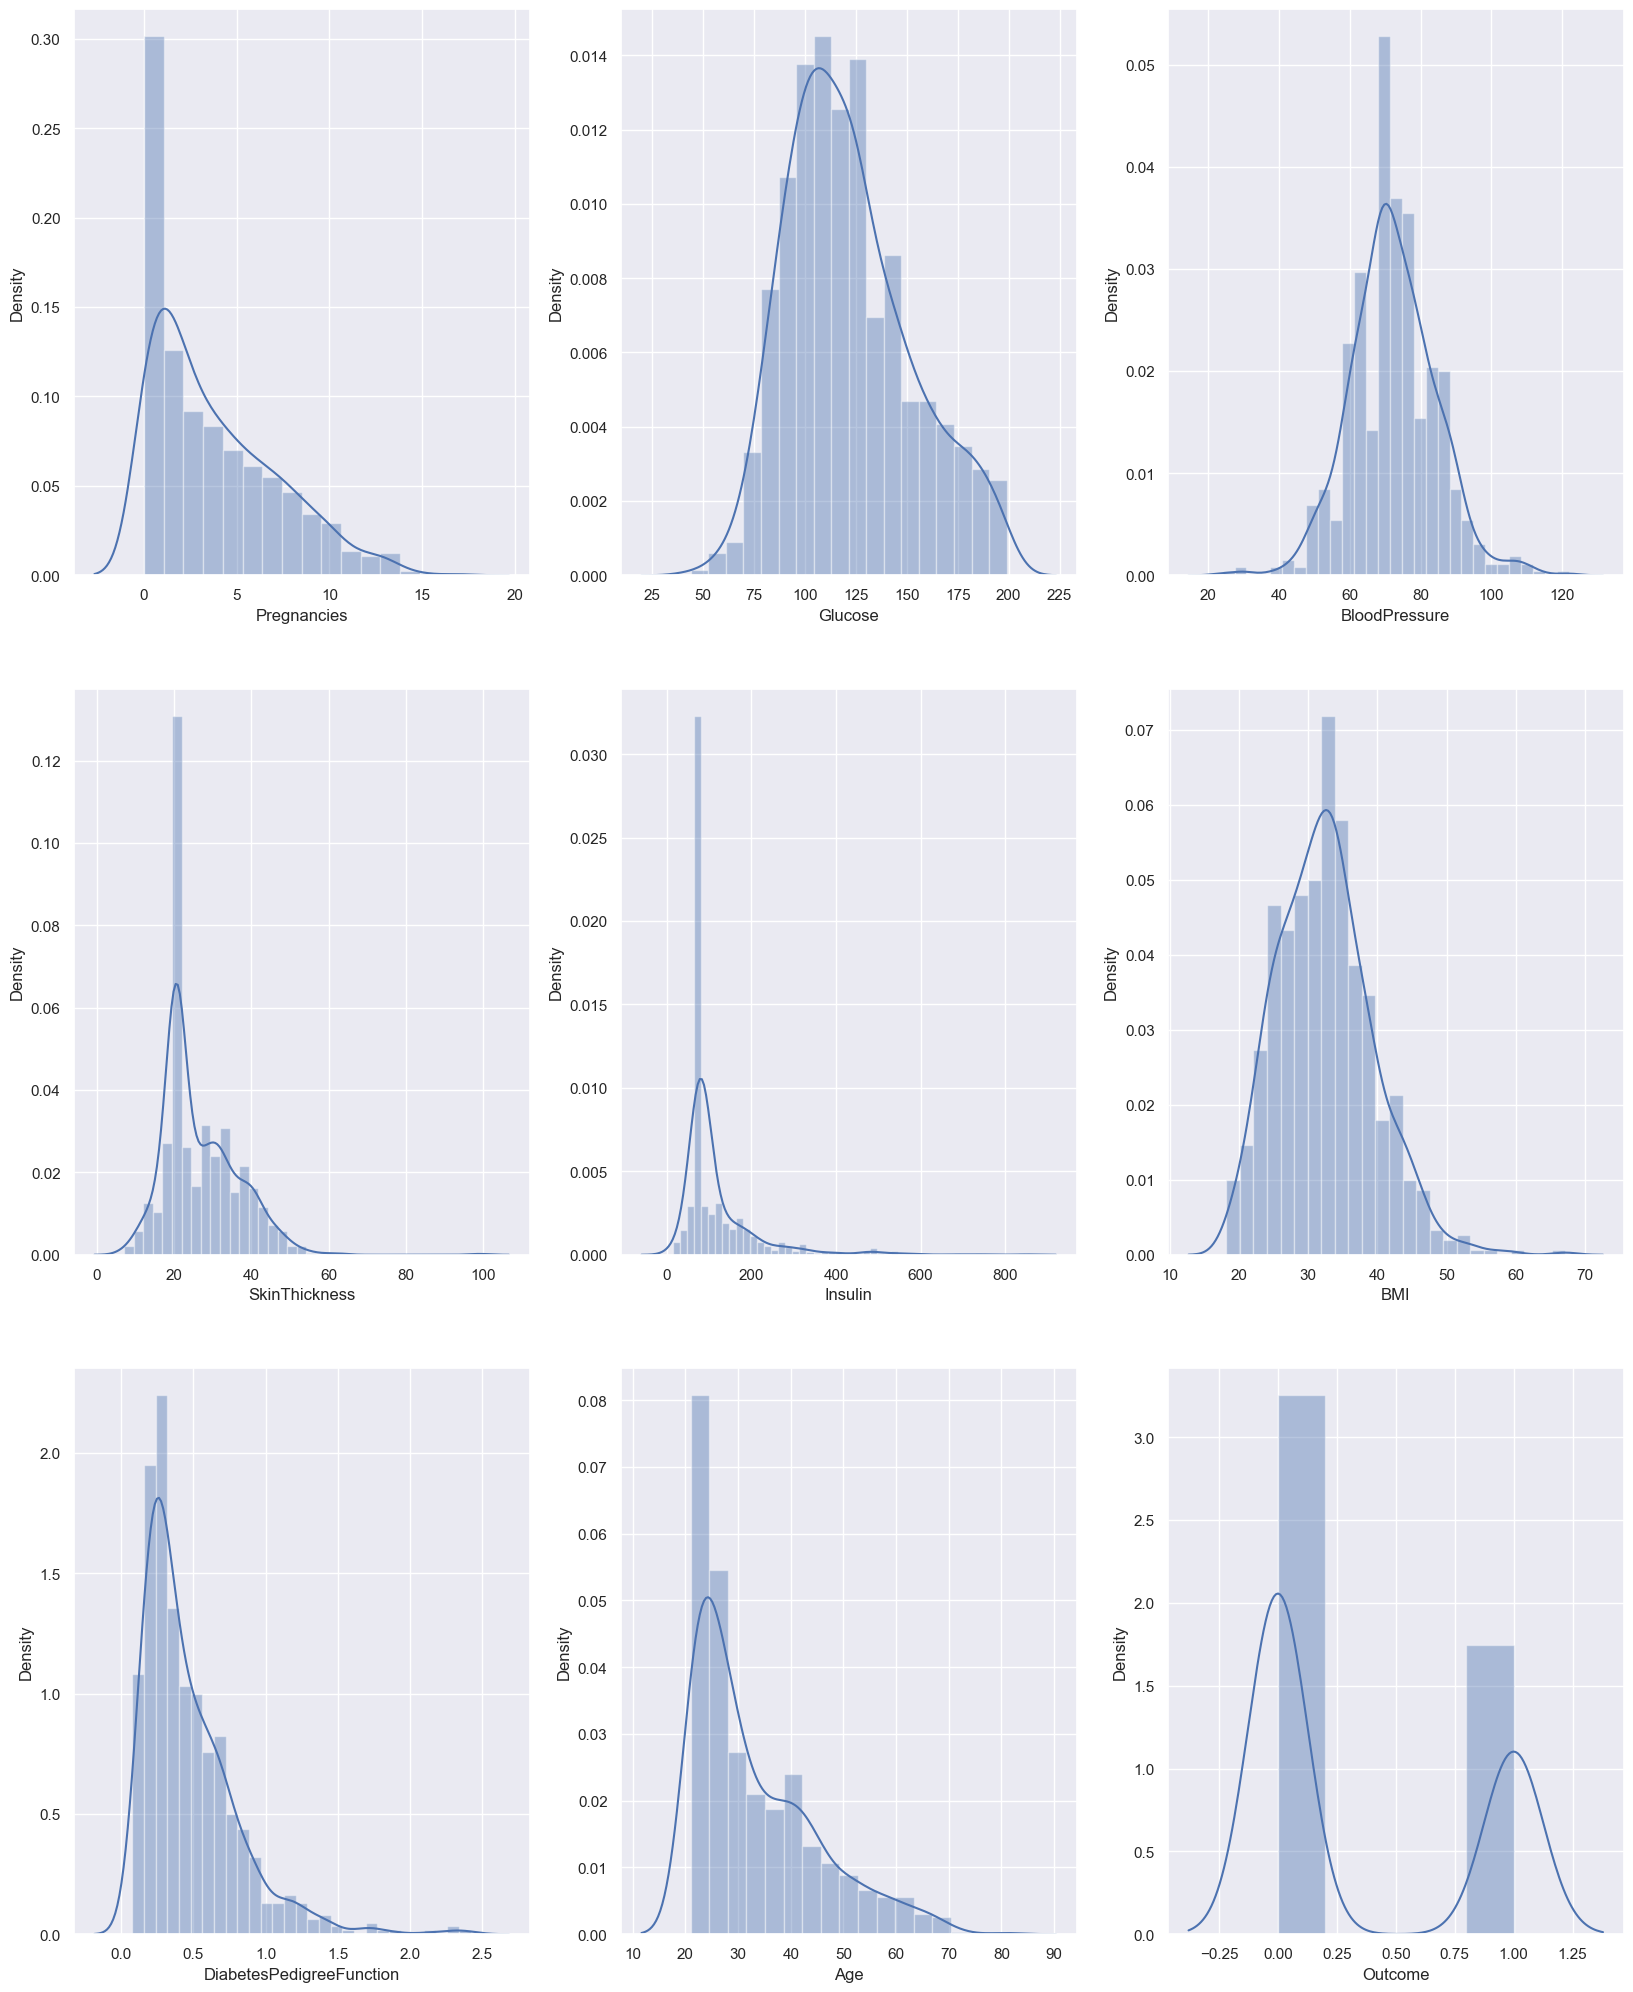

In [12]:
# Again let's see the distribution of the data

plt.figure(figsize=(20,25))
plotnumber = 1
for i in df:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber += 1
plt.show()

In [27]:
# Removing top 2% data from pregnancy column
q = df['Pregnancies'].quantile(.98)
data_cleaned = df[df['Pregnancies']<q]

# Removing 5% data from insulin column
q = data_cleaned['Insulin'].quantile(.95)
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

# removing 1% data from skin thickness,BMI,diabetespedigree and age
q = data_cleaned['SkinThickness'].quantile(.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['BMI'].quantile(.99)
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(.99)
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(.99)
data_cleaned = data_cleaned[data_cleaned['Age']<q]

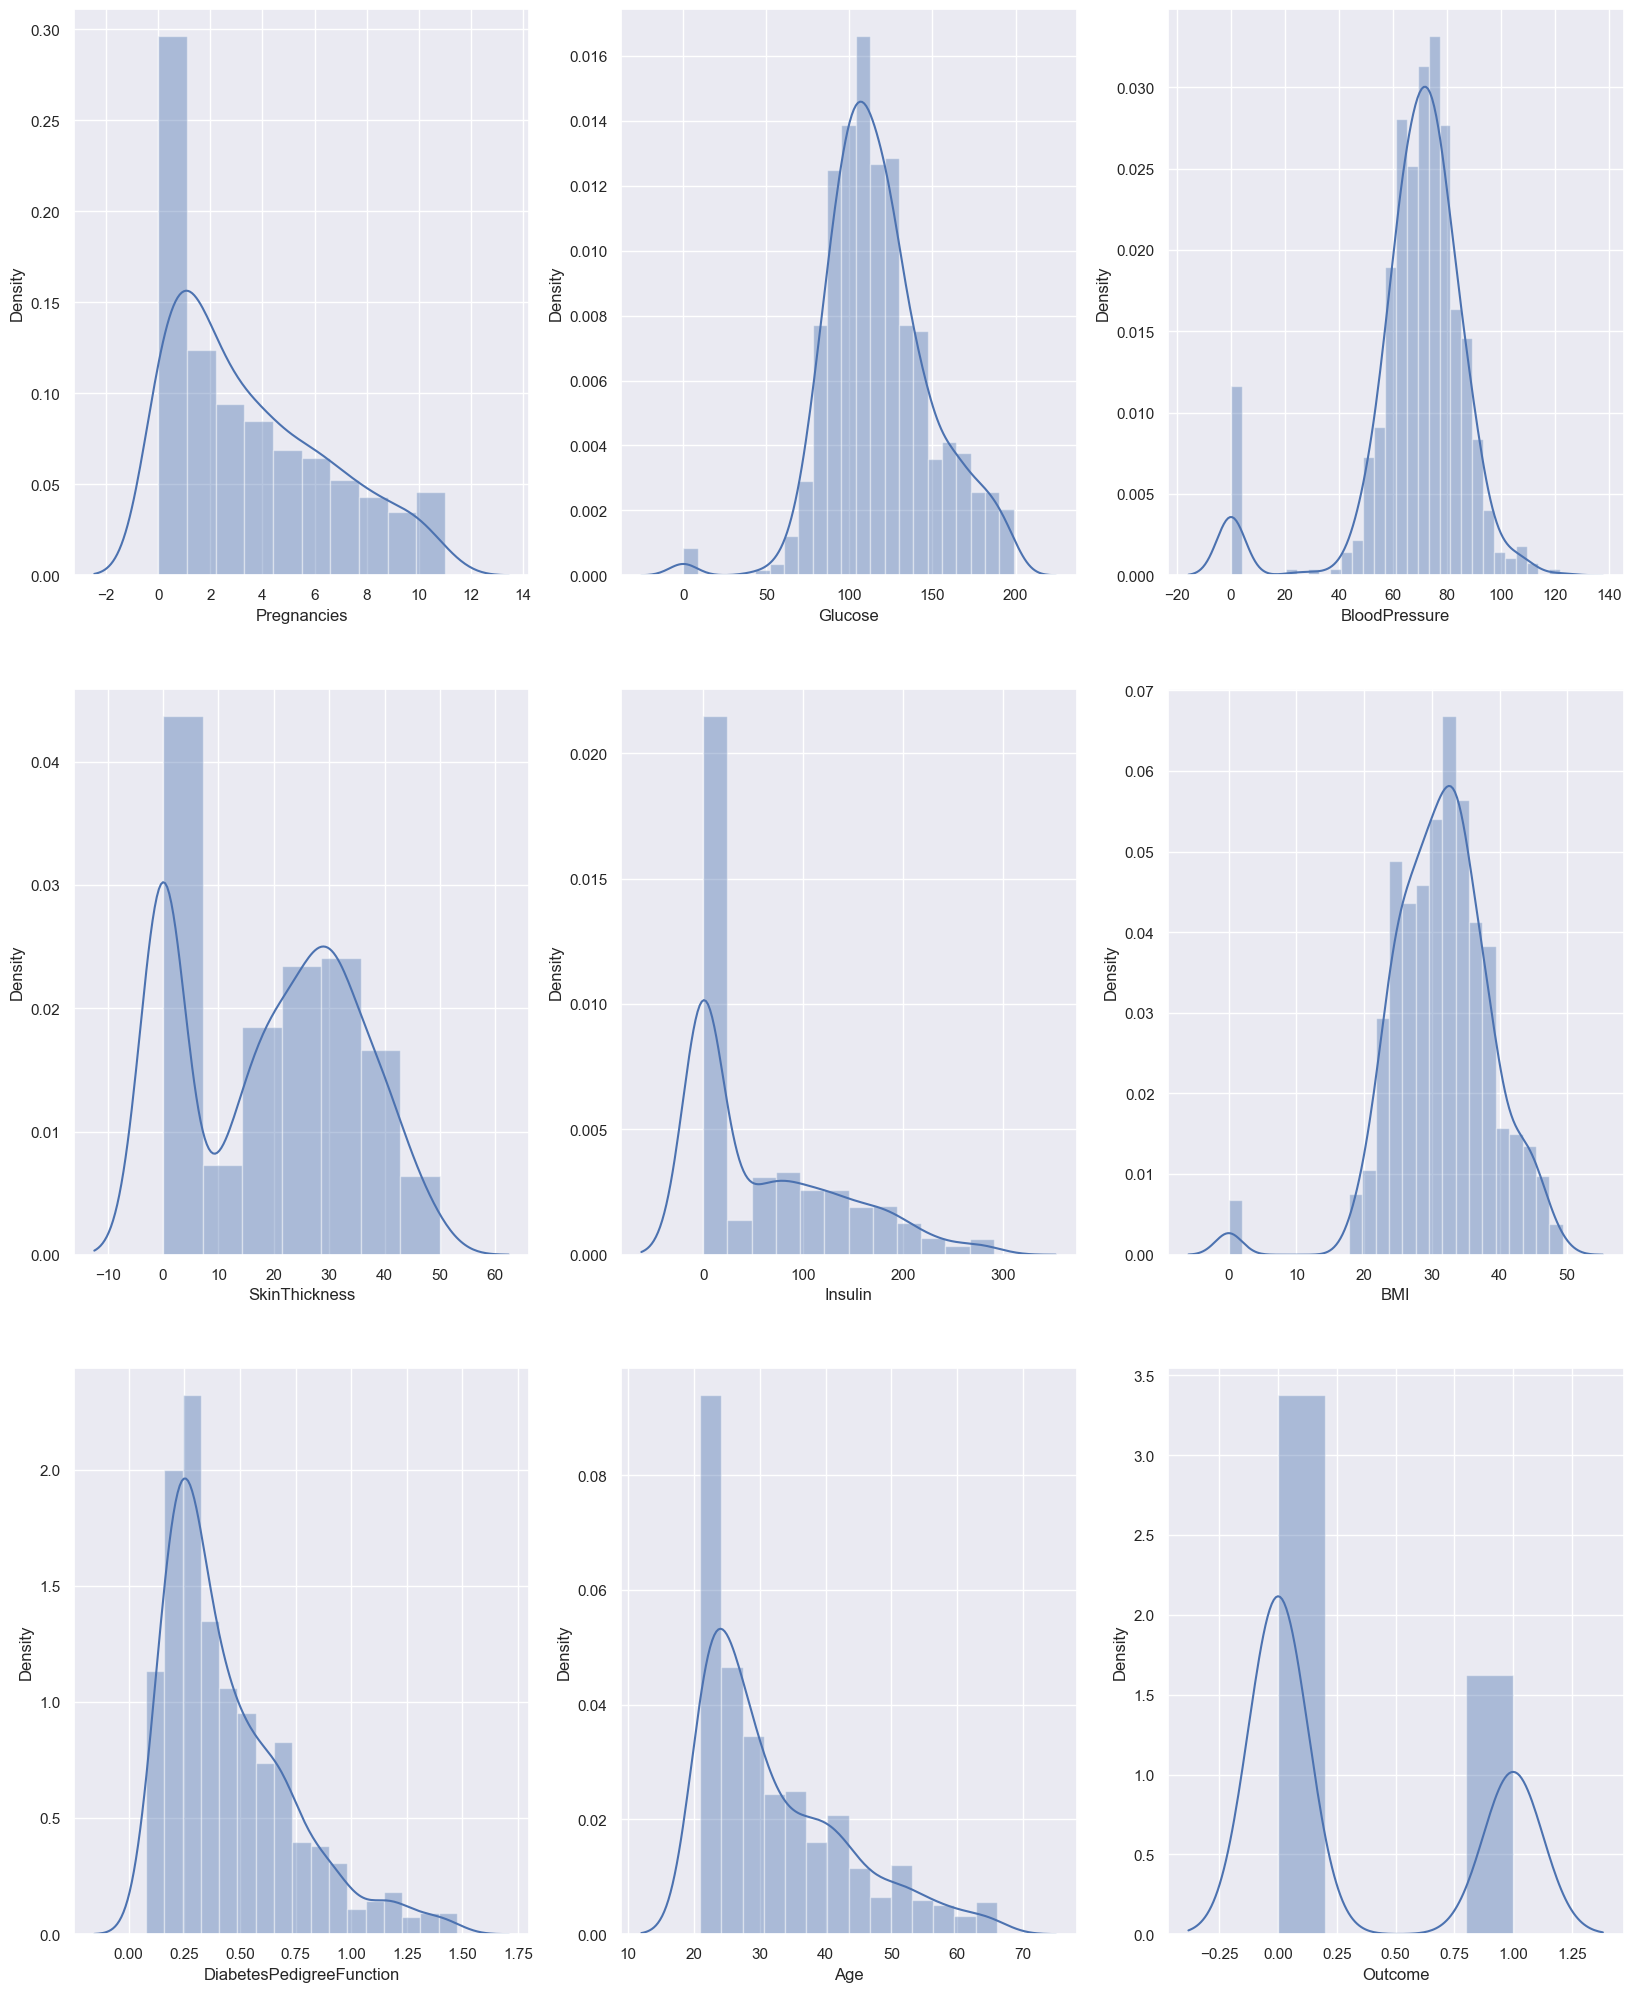

In [28]:
# Let's see the data distribution

plotnumber = 1
plt.figure(figsize=(20,25))
for i in data_cleaned:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[i])
        plt.xlabel(i)
    plotnumber += 1
plt.show()

# Analysis

In [29]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [30]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [31]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

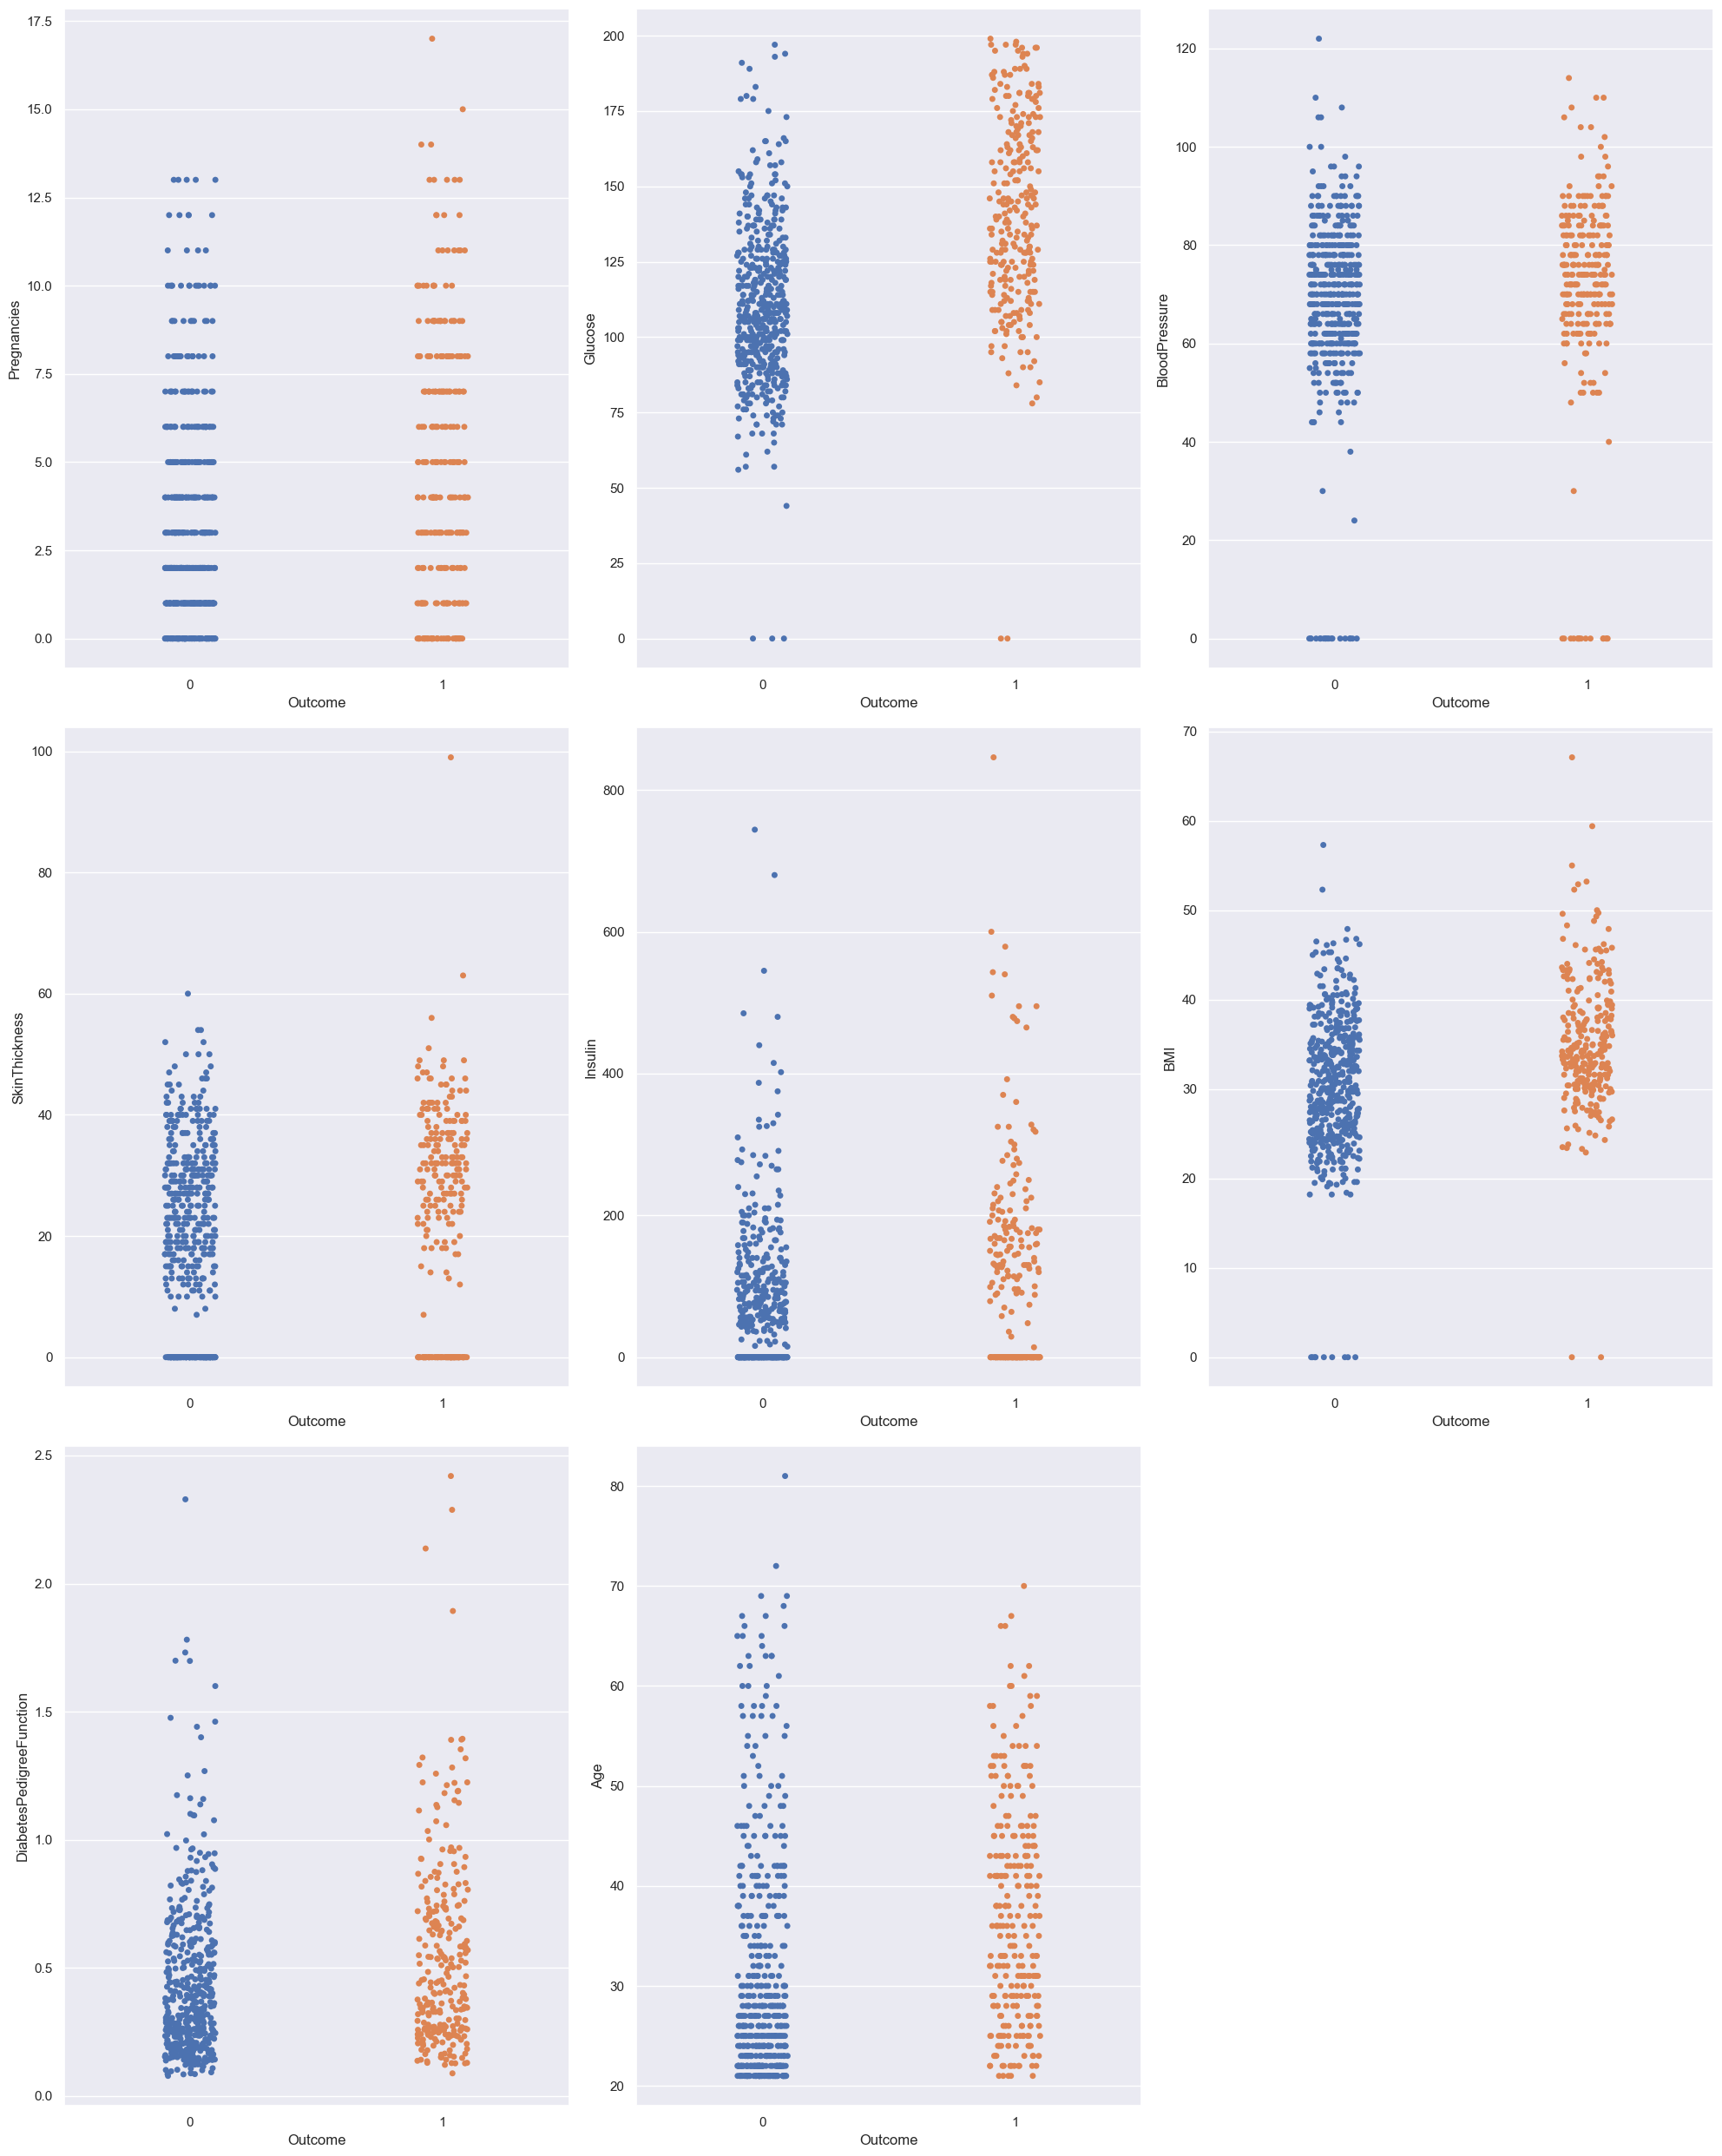

In [32]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        #plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Standardisation/Scaling the data

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [35]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.430872,Pregnancies
1,1.298961,Glucose
2,1.181863,BloodPressure
3,1.507432,SkinThickness
4,1.427536,Insulin
5,1.297450,BMI
6,1.067090,DiabetesPedigreeFunction
7,1.588368,Age


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

# Model Saving

In [39]:
# model saving or pickling our model
import pickle
# Writting different model files to file
with open('modelforprediction.sav','wb') as f:
    pickle.dump(log_reg,f) # Serialize process
    
with open('standardscaler.sav','wb') as f:
    pickle.dump(scaler,f)

In [ ]:
# Unserialize process
#pickle.load(open(filename,'rb'))

In [44]:
# r2 score
log_res.score(x_train,y_train)

0.7881944444444444

In [40]:
y_pred = log_reg.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.765625

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [49]:
conf_mat = confusion_matrix(y_test,y_pred)

In [50]:
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [51]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [52]:
# Breaking down the formula for accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [60]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [61]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7746478873239436

In [62]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8239700374531835

In [63]:
auc = roc_auc_score(y_test,y_pred)
auc

0.7011940298507463

In [64]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)